In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv("out/data.csv")
df['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)
df.head()

,ID,Start Time,Duration,Duration Milliseconds,Error
0,GET /,2024-02-12 09:07:27+00:00,309.119709ms,309,NaN
1,GET /anything,2024-02-12 09:07:27+00:00,449.034542ms,449,NaN
2,PUT /anything,2024-02-12 09:07:28+00:00,297.968459ms,297,NaN
3,GET /,2024-02-12 09:07:28+00:00,299.442792ms,299,NaN
4,GET /anything,2024-02-12 09:07:28+00:00,298.209833ms,298,NaN


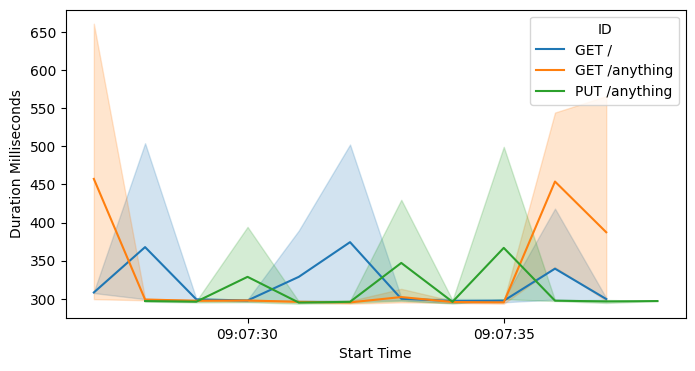

In [27]:
plt.figure(figsize=(8,4))
sns.lineplot(data=df,x='Start Time',y='Duration Milliseconds',hue="ID")
plt.show()

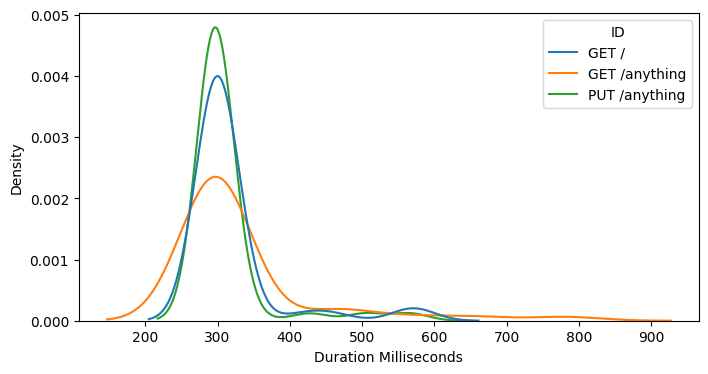

In [28]:
plt.figure(figsize=(8,4))
sns.kdeplot(data=df,x='Duration Milliseconds',hue="ID")
plt.show()